In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv", delimiter=',')
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv", delimiter=',')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data.head(10)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
5,o848,Stelasyn
6,z314,Stelasyn
7,g989,Stelasyn
8,m269,Stelasyn
9,a963,Stelasyn


In [3]:
# Combine the data into a single dataset
total_data = pd.merge(mouse_drug_data, clinical_trial_data, on='Mouse ID', how='outer')
total_data.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [4]:
# Display the data table for preview

## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
grouped_data = total_data.groupby(['Drug','Timepoint'])
mean_data = grouped_data.mean()
mean_data.head(20)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111
          25                  54.287674          1.500000
          30                  56.769517          1.937500
          35                  58.827548          2.071429
          40                  61.467895          2.357143
          45                  64.132421          2.692308

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
from scipy.stats import sem
error_data = grouped_data.sem()
error_data.head(20)

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731
          25                 0.181818       NaN            0.881642
          30                 0.172944       NaN            0.934460
          35                 0.169496       NaN            1.052241
          40                 0.175610       NaN            1.223608
          45                 0.202591       NaN            1.223977
Ceftamin  0                  0.000000       NaN            0.000000
          5                  0.108588       NaN            0.164505
          10                 0.152177       NaN            0.236144
          15                 0.180625       NaN            0.332053
          20                 0.241034       NaN            0.359482
          25                 0.258831       NaN            0.439356
          30                 0.249479       NaN            0.490620
          35                 0.266526       NaN            0.692248
          40                 0.289128       NaN            0.708505
          45                 0.286101       NaN            0.902358

In [7]:
#combine data sets to get a single DataFrame
mean_data['Tumor Volume SEM'] = error_data['Tumor Volume (mm3)']
mean_data['Metastatic SEM'] = error_data['Metastatic Sites']
mean_data.head(20)

Tumor Volume (mm3)  Metastatic Sites  Tumor Volume SEM  \
Drug      Timepoint                                                           
Capomulin 0                   45.000000          0.000000          0.000000   
          5                   44.266086          0.160000          0.448593   
          10                  43.084291          0.320000          0.702684   
          15                  42.064317          0.375000          0.838617   
          20                  40.716325          0.652174          0.909731   
          25                  39.939528          0.818182          0.881642   
          30                  38.769339          1.090909          0.934460   
          35                  37.816839          1.181818          1.052241   
          40                  36.958001          1.380952          1.223608   
          45                  36.236114          1.476190          1.223977   
Ceftamin  0                   45.000000          0.000000          0.000000   
          5                   46.503051          0.380952          0.164505   
          10                  48.285125          0.600000          0.236144   
          15                  50.094055          0.789474          0.332053   
          20                  52.157049          1.111111          0.359482   
          25                  54.287674          1.500000          0.439356   
          30                  56.769517          1.937500          0.490620   
          35                  58.827548          2.071429          0.692248   
          40                  61.467895          2.357143          0.708505   
          45                  64.132421          2.692308          0.902358   

                     Metastatic SEM  
Drug      Timepoint                  
Capomulin 0                0.000000  
          5                0.074833  
          10               0.125433  
          15               0.132048  
          20               0.161621  
          25               0.181818  
          30               0.172944  
          35               0.169496  
          40               0.175610  
          45               0.202591  
Ceftamin  0                0.000000  
          5                0.108588  
          10               0.152177  
          15               0.180625  
          20               0.241034  
          25               0.258831  
          30               0.249479  
          35               0.266526  
          40               0.289128  
          45               0.286101

In [8]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
#Tried a bunch of indexing and nothing worked because the 'Drug' and 'Timepoint' were not in 
#the index! Maybe because these were inherited from the groupby object? Try resetting the entire
#index for the finalized mean_data and see if this works for subsequent transposing.
reset_mean_data = mean_data.reset_index()
reset_mean_data.head(20)
#Transpose using the pd.transpose function in Pandas
#transpose_mean_data = reset_mean_data.transpose()
#transpose_mean_data.head(20)
#Not exactly what I am after!

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume SEM,Metastatic SEM
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000
1,Capomulin,5,44.266086,0.160000,0.448593,0.074833
2,Capomulin,10,43.084291,0.320000,0.702684,0.125433
3,Capomulin,15,42.064317,0.375000,0.838617,0.132048
4,Capomulin,20,40.716325,0.652174,0.909731,0.161621
5,Capomulin,25,39.939528,0.818182,0.881642,0.181818
6,Capomulin,30,38.769339,1.090909,0.934460,0.172944
7,Capomulin,35,37.816839,1.181818,1.052241,0.169496
8,Capomulin,40,36.958001,1.380952,1.223608,0.175610
9,Capomulin,45,36.236114,1.476190,1.223977,0.202591


In [9]:
reset_mean_data['Drug'].value_counts()

Ketapril     10
Stelasyn     10
Placebo      10
Zoniferol    10
Naftisol     10
Ramicane     10
Infubinol    10
Capomulin    10
Ceftamin     10
Propriva     10
Name: Drug, dtype: int64

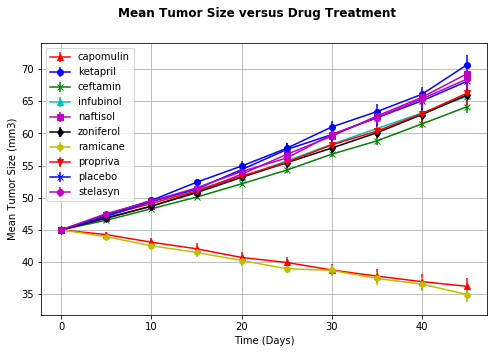

In [10]:
#Setup Data for Plotting
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

capomulin_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Capomulin']
capomulin_tumor_mean = capomulin_data['Tumor Volume (mm3)']
capomulin_tumor_error = capomulin_data['Tumor Volume SEM']

ketapril_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Ketapril']
ketapril_tumor_mean = ketapril_data['Tumor Volume (mm3)']
ketapril_tumor_error = ketapril_data['Tumor Volume SEM']

ceftamin_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Ceftamin']
ceftamin_tumor_mean = ceftamin_data['Tumor Volume (mm3)']
ceftamin_tumor_error = ceftamin_data['Tumor Volume SEM']

infubinol_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Infubinol']
infubinol_tumor_mean = infubinol_data['Tumor Volume (mm3)']
infubinol_tumor_error = infubinol_data['Tumor Volume SEM']

naftisol_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Naftisol']
naftisol_tumor_mean = naftisol_data['Tumor Volume (mm3)']
naftisol_tumor_error = naftisol_data['Tumor Volume SEM']

zoniferol_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Zoniferol']
zoniferol_tumor_mean = zoniferol_data['Tumor Volume (mm3)']
zoniferol_tumor_error = zoniferol_data['Tumor Volume SEM']

ramicane_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Ramicane']
ramicane_tumor_mean = ramicane_data['Tumor Volume (mm3)']
ramicane_tumor_error = ramicane_data['Tumor Volume SEM']

propriva_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Propriva']
propriva_tumor_mean = propriva_data['Tumor Volume (mm3)']
propriva_tumor_error = propriva_data['Tumor Volume SEM']

placebo_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Placebo']
placebo_tumor_mean = placebo_data['Tumor Volume (mm3)']
placebo_tumor_error = placebo_data['Tumor Volume SEM']

stelasyn_data = reset_mean_data.loc[reset_mean_data['Drug'] == 'Stelasyn']
stelasyn_tumor_mean = stelasyn_data['Tumor Volume (mm3)']
stelasyn_tumor_error = stelasyn_data['Tumor Volume SEM']

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(x_axis, capomulin_tumor_mean, capomulin_tumor_error, marker='^', color='r', label='capomulin')
ax.errorbar(x_axis, ketapril_tumor_mean, ketapril_tumor_error, marker='o', color='b', label='ketapril')
ax.errorbar(x_axis, ceftamin_tumor_mean, ceftamin_tumor_error, marker='x', color='g', label='ceftamin')
ax.errorbar(x_axis, infubinol_tumor_mean, infubinol_tumor_error, marker='^', color='c', label='infubinol')
ax.errorbar(x_axis, naftisol_tumor_mean, naftisol_tumor_error, marker='s', color='m', label='naftisol')
ax.errorbar(x_axis, zoniferol_tumor_mean, zoniferol_tumor_error, marker='d', color='k', label='zoniferol')
ax.errorbar(x_axis, ramicane_tumor_mean, ramicane_tumor_error, marker='h', color='y', label='ramicane')
ax.errorbar(x_axis, propriva_tumor_mean, propriva_tumor_error, marker='v', color='r', label='propriva')
ax.errorbar(x_axis, placebo_tumor_mean, placebo_tumor_error, marker='x', color='b', label='placebo')
ax.errorbar(x_axis, stelasyn_tumor_mean, stelasyn_tumor_error, marker='o', color='m', label='stelasyn')
ax.legend(loc=2)

fig.suptitle('Mean Tumor Size versus Drug Treatment', fontsize=12, fontweight='bold')
fig.figsize=(30,20)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Mean Tumor Size (mm3)')
ax.grid()
# Save the Figure
plt.savefig('TumorSizeVDrug', dpi=300)

In [11]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
metastatic_data = reset_mean_data[['Drug', 'Timepoint', 'Metastatic Sites', 'Metastatic SEM']]
metastatic_data.head()

,Drug,Timepoint,Metastatic Sites,Metastatic SEM
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
#ALREADY DONE IN PREVIOUS STEP!!!

In [14]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked


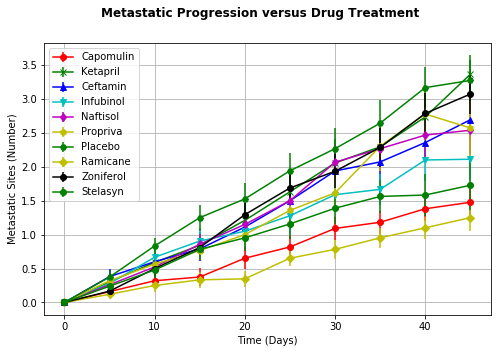

In [86]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
capomulin_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Capomulin']
capomulin_mst = capomulin_metastatic['Metastatic Sites']
capomulin_mst_error = capomulin_metastatic['Metastatic SEM']

ketapril_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Ketapril']
ketapril_mst = ketapril_metastatic['Metastatic Sites']
ketapril_mst_error = ketapril_metastatic['Metastatic SEM']

ceftamin_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Ceftamin']
ceftamin_mst = ceftamin_metastatic['Metastatic Sites']
ceftamin_mst_error = ceftamin_metastatic['Metastatic SEM']

infubinol_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Infubinol']
infubinol_mst = infubinol_metastatic['Metastatic Sites']
infubinol_mst_error = infubinol_metastatic['Metastatic SEM']

naftisol_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Naftisol']
naftisol_mst = naftisol_metastatic['Metastatic Sites']
naftisol_mst_error = naftisol_metastatic['Metastatic SEM']

propriva_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Propriva']
propriva_mst = propriva_metastatic['Metastatic Sites']
propriva_mst_error = propriva_metastatic['Metastatic SEM']

placebo_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Placebo']
placebo_mst = placebo_metastatic['Metastatic Sites']
placebo_mst_error = placebo_metastatic['Metastatic SEM']

ramicane_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Ramicane']
ramicane_mst = ramicane_metastatic['Metastatic Sites']
ramicane_mst_error = ramicane_metastatic['Metastatic SEM']

zoniferol_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Zoniferol']
zoniferol_mst = zoniferol_metastatic['Metastatic Sites']
zoniferol_mst_error = zoniferol_metastatic['Metastatic SEM']

stelasyn_metastatic = metastatic_data.loc[metastatic_data['Drug'] == 'Stelasyn']
stelasyn_mst = stelasyn_metastatic['Metastatic Sites']
stelasyn_mst_error = stelasyn_metastatic['Metastatic SEM']

#Plotting the metastatic data in the same manner as for tumor data
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

fig2, ax2 = plt.subplots(figsize=(8,5))

ax2.errorbar(x_axis, capomulin_mst, capomulin_mst_error, marker= 'o', color='r', label='Capomulin')
ax2.errorbar(x_axis, ketapril_mst, ketapril_mst_error, marker= 'x', color='g', label='Ketapril')
ax2.errorbar(x_axis, ceftamin_mst, ceftamin_mst_error, marker= '^', color='b', label='Ceftamin')
ax2.errorbar(x_axis, infubinol_mst, infubinol_mst_error, marker= 'v', color='c', label='Infubinol')
ax2.errorbar(x_axis, naftisol_mst, naftisol_mst_error, marker= 'd', color='m', label='Naftisol')
ax2.errorbar(x_axis, propriva_mst, propriva_mst_error, marker= 'h', color='y', label='Propriva')
ax2.errorbar(x_axis, placebo_mst, placebo_mst_error, marker= 'H', color='g', label='Placebo')
ax2.errorbar(x_axis, ramicane_mst, ramicane_mst_error, marker= 'D', color='y', label='Ramicane')
ax2.errorbar(x_axis, zoniferol_mst, zoniferol_mst_error, marker= 'o', color='k', label='Zoniferol')
ax2.errorbar(x_axis, stelasyn_mst, stelasyn_mst_error, marker= 'o', color='g', label='Stelasyn')

fig2.suptitle('Metastatic Progression versus Drug Treatment', fontsize=12, fontweight='bold')
ax2.legend(loc='upper left')
ax2.set_xlabel('Time (Days)')
ax2.set_ylabel('Metastatic Sites (Number)')
ax2.grid()

#Save figure
plt.savefig('MetastaticProgressVDrug', dpi=300)

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [72]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
#These data are probably in the total_data from the merged data at the very start of this exercise! Compile from there.

#When I tried to develop a survival "curve" in the next steps, I found a really strange problem. The iteration for loop
#generated not one list with percent survival data, but two separate lists. I have saved a copy of the graph that showed
#this and saved the following script information for future followup. I will proceed using an alternative approach to
#isolate the desired data without groupby object until after I have acquired the data necessary for survival calculation.
#mouse_group = total_data.groupby(['Drug', 'Timepoint'])
#mouse_survival = mouse_group['Drug'].value_counts()
#mouse_survival

#isolate data for each drug, groupby drug and timepoint for count(), then use counts to calculate survival percent.
capomulin_data = total_data.loc[total_data['Drug'] == 'Capomulin']
grouped_capomulin = capomulin_data.groupby(['Drug', 'Timepoint']).count()

ketapril_data = total_data.loc[total_data['Drug'] == 'Ketapril']
grouped_ketapril = ketapril_data.groupby(['Drug', 'Timepoint']).count()

ceftamin_data = total_data.loc[total_data['Drug'] == 'Ceftamin']
grouped_ceftamin = ceftamin_data.groupby(['Drug', 'Timepoint']).count()

infubinol_data = total_data.loc[total_data['Drug'] == 'Infubinol']
grouped_infubinol = infubinol_data.groupby(['Drug', 'Timepoint']).count()

naftisol_data = total_data.loc[total_data['Drug'] == 'Naftisol']
grouped_naftisol = naftisol_data.groupby(['Drug', 'Timepoint']).count()

propriva_data = total_data.loc[total_data['Drug'] == 'Propriva']
grouped_propriva = propriva_data.groupby(['Drug', 'Timepoint']).count()

placebo_data = total_data.loc[total_data['Drug'] == 'Placebo']
grouped_placebo = placebo_data.groupby(['Drug', 'Timepoint']).count()

ramicane_data = total_data.loc[total_data['Drug'] == 'Ramicane']
grouped_ramicane = ramicane_data.groupby(['Drug', 'Timepoint']).count()

zoniferol_data = total_data.loc[total_data['Drug'] == 'Zoniferol']
grouped_zoniferol = zoniferol_data.groupby(['Drug', 'Timepoint']).count()

stelasyn_data = total_data.loc[total_data['Drug'] == 'Stelasyn']
grouped_stelasyn = stelasyn_data.groupby(['Drug', 'Timepoint']).count()

In [75]:
#calculate percent survival in a new column using a list comprehension. Starting mice are all 25.
grouped_capomulin['Percent Survival'] = [(i/25)*100 for i in grouped_capomulin['Mouse ID']]
grouped_ketapril['Percent Survival'] = [(i/25)*100 for i in grouped_ketapril['Mouse ID']]
grouped_ceftamin['Percent Survival'] = [(i/25)*100 for i in grouped_ceftamin['Mouse ID']]
grouped_infubinol['Percent Survival'] = [(i/25)*100 for i in grouped_infubinol['Mouse ID']]
grouped_naftisol['Percent Survival'] = [(i/25)*100 for i in grouped_naftisol['Mouse ID']]
grouped_propriva['Percent Survival'] = [(i/26)*100 for i in grouped_propriva['Mouse ID']]
grouped_placebo['Percent Survival'] = [(i/25)*100 for i in grouped_placebo['Mouse ID']]
grouped_ramicane['Percent Survival'] = [(i/25)*100 for i in grouped_ramicane['Mouse ID']]
grouped_zoniferol['Percent Survival'] = [(i/25)*100 for i in grouped_zoniferol['Mouse ID']]
grouped_stelasyn['Percent Survival'] = [(i/26)*100 for i in grouped_stelasyn['Mouse ID']]
grouped_stelasyn

Mouse ID  Tumor Volume (mm3)  Metastatic Sites  \
Drug     Timepoint                                                   
Stelasyn 0                26                  26                26   
         5                25                  25                25   
         10               23                  23                23   
         15               23                  23                23   
         20               21                  21                21   
         25               19                  19                19   
         30               18                  18                18   
         35               16                  16                16   
         40               12                  12                12   
         45               11                  11                11   

                    Percent Survival  
Drug     Timepoint                    
Stelasyn 0                100.000000  
         5                 96.153846  
         10                88.461538  
         15                88.461538  
         20                80.769231  
         25                73.076923  
         30                69.230769  
         35                61.538462  
         40                46.153846  
         45                42.307692

In [58]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [59]:
#Isolate each survival experiment in numbers of mice and convert to percentages.
#MAJOR PROBLEM! The indexing through the following generated not one list, but apparently 2 lists from the
#mouse_survival.loc['Drug'] dataframe!
#capomulin_survival = mouse_survival.loc['Capomulin']
#capomulin_percent = []
#for i in range(len(capomulin_survival)):
#    x = capomulin_survival[i] / capomulin_survival[0]
#    capomulin_percent.append(x[0]*100)

#Maybe related to the iteration from the groupby object from the last step. Try what I did before
#and reset the index. That didn't work. Problem is with the iteration in Pandas: Pandas iterates on its own.
   
#Made the survival percentages from 0-45 days in 5 day increments as a new Percent Survival column in each
#grouped_drug dataframe. Try using this column for subsequent steps.


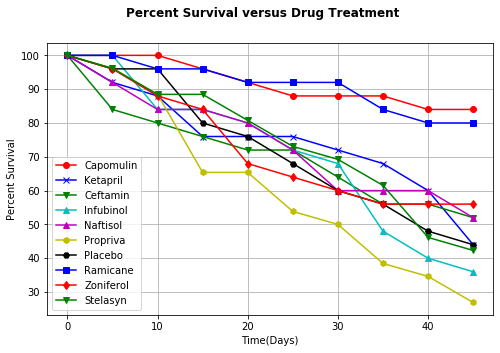

In [93]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

fig = plt.figure(figsize=(8,5))
plt.plot(x_axis, grouped_capomulin['Percent Survival'], marker='o', color='r', label='Capomulin')
plt.plot(x_axis, grouped_ketapril['Percent Survival'], marker='x', color='b', label='Ketapril')
plt.plot(x_axis, grouped_ceftamin['Percent Survival'], marker='v', color='g', label='Ceftamin')
plt.plot(x_axis, grouped_infubinol['Percent Survival'], marker='^', color='c', label='Infubinol')
plt.plot(x_axis, grouped_naftisol['Percent Survival'], marker='^', color='m', label='Naftisol')
plt.plot(x_axis, grouped_propriva['Percent Survival'], marker='h', color='y', label='Propriva')
plt.plot(x_axis, grouped_placebo['Percent Survival'], marker='H', color='k', label='Placebo')
plt.plot(x_axis, grouped_ramicane['Percent Survival'], marker='s', color='b', label='Ramicane')
plt.plot(x_axis, grouped_zoniferol['Percent Survival'], marker='d', color='r', label='Zoniferol')
plt.plot(x_axis, grouped_stelasyn['Percent Survival'], marker='v', color='g', label='Stelasyn')

plt.legend()
plt.suptitle('Percent Survival versus Drug Treatment', fontsize=12, fontweight='bold')
plt.xlabel('Time(Days)')
plt.ylabel('Percent Survival')
plt.grid()

#Save the figure
plt.savefig('PercentSurvivalVDrug', dpi=300)

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [122]:
# Calculate the percent changes for each drug

# Display the data to confirm
capomulin_change = ((capomulin_tumor_mean[9] / capomulin_tumor_mean[0])-1.0)*100
ceftamin_change = ((ceftamin_tumor_mean[19] / ceftamin_tumor_mean[10])-1.0)*100
infubinol_change = ((infubinol_tumor_mean[29] / infubinol_tumor_mean[20])-1.0)*100
ketapril_change = ((ketapril_tumor_mean[39] / ketapril_tumor_mean[30])-1.0)*100
naftisol_change = ((naftisol_tumor_mean[49] / naftisol_tumor_mean[40])-1.0)*100
placebo_change = ((placebo_tumor_mean[59] / placebo_tumor_mean[50])-1.0)*100
propriva_change = ((propriva_tumor_mean[69] / propriva_tumor_mean[60])-1.0)*100
ramicane_change = ((ramicane_tumor_mean[79] / ramicane_tumor_mean[70])-1.0)*100
stelasyn_change = ((stelasyn_tumor_mean[89] / stelasyn_tumor_mean[80])-1.0)*100
zoniferol_change = ((zoniferol_tumor_mean[99] / zoniferol_tumor_mean[90])-1.0)*100

In [169]:
drug_change = [capomulin_change, ceftamin_change, infubinol_change, ketapril_change, naftisol_change, placebo_change, propriva_change, ramicane_change, stelasyn_change, zoniferol_change]
round_drug_change = [round(i, 2) for i in drug_change]
round_drug_change

[-19.48, 42.52, 46.12, 57.03, 53.92, 51.3, 47.24, -22.32, 52.09, 46.58]

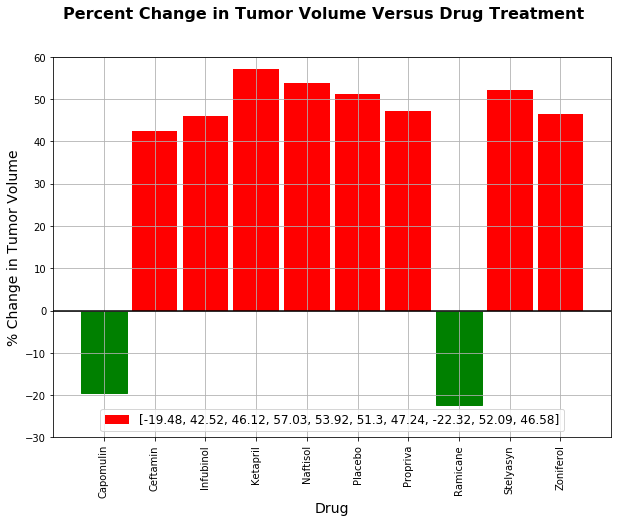

In [205]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
x_axis = [i for i in range(0, len(drug_change), 1)]

plt.figure(figsize=(10,7))
barfig = plt.bar(x=x_axis, height=round_drug_change, color='r', align='center', label=round_drug_change, width=0.9)
plt.xticks(x_axis, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelyasyn', 'Zoniferol'], rotation='vertical')
plt.hlines(0, -1, 11)
plt.grid()

plt.suptitle('Percent Change in Tumor Volume Versus Drug Treatment', fontsize=16, fontweight='bold')
plt.xlabel('Drug', fontsize=14)
plt.ylabel('% Change in Tumor Volume', fontsize=14)
plt.xlim(-1, len(x_axis))
plt.ylim(-30, +60)
plt.legend(loc='lower center', fontsize=12)
barfig[0].set_color('g')
barfig[7].set_color('g')

#Save Figure
plt.savefig('PercentChangeTumorVDrug', dpi=300)

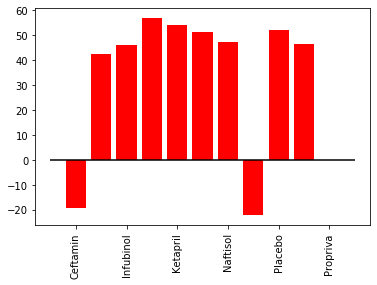

In [184]:
#Now try using another approach defining the fig in ax3 subplots function.

fig3, ax3 = plt.subplots()
ax3.bar(x_axis, height=round_drug_change, color='r', align='center', label=round_drug_change)

ax3.set_xticklabels(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelyasyn', 'Zoniferol'], rotation='vertical')
plt.hlines(0, -1, 11)


![Metastatic Spread During Treatment](../Images/change.png)